In [65]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
buildingProperties = pd.read_csv('./ENB2012_data.csv', sep=';')

In [67]:
simulationProperties = pd.read_csv('./ENB2012_data_f.csv', sep=';')

In [68]:
buildingProperties.describe();

In [69]:
print(buildingProperties.sample(5));

     Relative compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
389                 0.900       563.500    318.500    122.500           7.000   
685                 0.820       612.500    318.500    147.000           7.000   
83                  0.690       735.000    294.000    220.500           3.500   
747                 0.740       686.000    245.000    220.500           3.500   
184                 0.640       784.000    343.000    220.500           3.500   

     Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
389            3         0.250                          3        32.400   
685            3         0.400                          4        28.050   
83             5         0.100                          1        11.160   
747            5         0.400                          5        14.390   
184            2         0.100                          3        15.160   

     Cooling Load  
389        35.100  
685        32.350  
83

In [70]:
print(buildingProperties['Relative compactness'].unique())

[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]


In [71]:
filas, columnas = buildingProperties.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 768
Número de columnas: 10


In [72]:
matriz_correlacion = buildingProperties.corr()

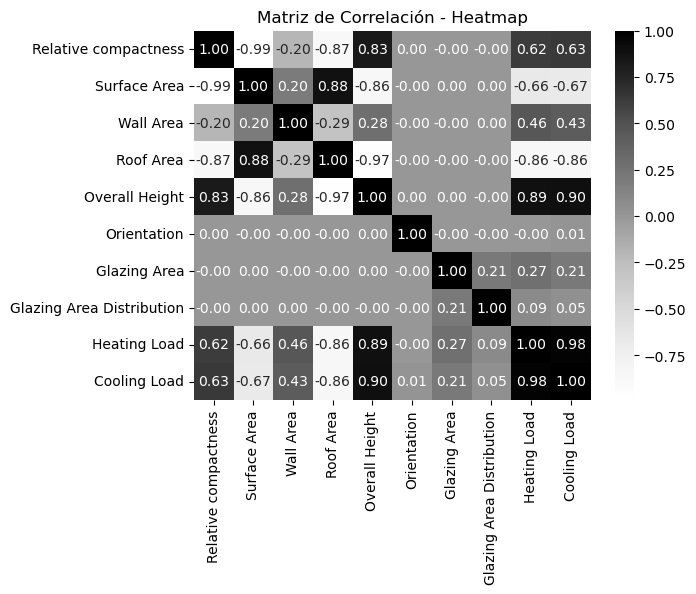

In [73]:
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='Greys', cbar=True)
plt.title("Matriz de Correlación - Heatmap")
plt.savefig("heatmap.png") 
plt.show() 


In [74]:
simulationProperties = simulationProperties.drop_duplicates()

In [75]:
firstProperties = simulationProperties.iloc[:, :8]
correlationMatrix = firstProperties.corr(method="spearman")
pd.options.display.float_format = "{:.3f}".format


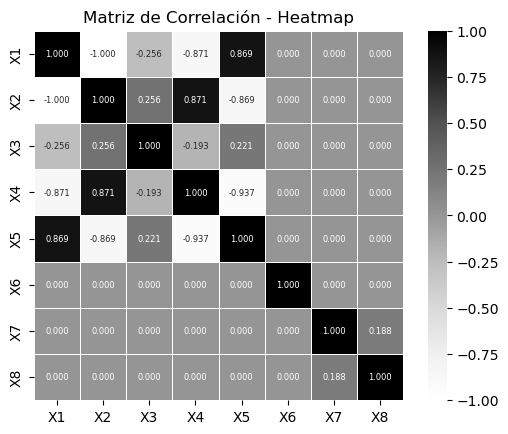

In [56]:
sns.heatmap(correlationMatrix, fmt=".3f", square=True, annot_kws={'size': 6}, linewidth=.5, cmap='Greys', cbar=True, annot=True)
plt.title("Matriz de Correlación - Heatmap")
plt.savefig("heatmap.png") 
plt.show() 

In [57]:
print(simulationProperties.dtypes) 

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


In [58]:
print(simulationProperties.nunique())

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    586
Y2    636
dtype: int64


In [59]:
from scipy.stats import spearmanr
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy.stats import entropy

tabla_asociacion = pd.DataFrame()

resultados = []

for column in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    nmi = normalized_mutual_info_score(simulationProperties[column].values, simulationProperties['Y1'])
    resultados.append((column, nmi))


info_mutua_normalizada = pd.DataFrame(resultados, columns=['Variable', 'NMI con Y1'])

tabla_asociacion['Variable'] = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Calcular Coeficiente de Spearman y Valor p para correlación con Y1
spearman_corr_y1 = []
spearman_p_value_y1 = []

for column in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    corr, p_value = spearmanr(simulationProperties[column], simulationProperties['Y1'])
    spearman_corr_y1.append(corr)
    spearman_p_value_y1.append(p_value)

tabla_asociacion['Información Mutua con Y1'] = info_mutua_normalizada['NMI con Y1']
tabla_asociacion['Coeficiente de Spearman con Y1'] = spearman_corr_y1
tabla_asociacion['Valor p para Spearman con Y1'] = spearman_p_value_y1


print("Tabla de Asociación con Y1:")
print(tabla_asociacion)

Tabla de Asociación con Y1:
  Variable  Información Mutua con Y1  Coeficiente de Spearman con Y1  \
0       X1                     0.532                           0.622   
1       X2                     0.532                          -0.622   
2       X3                     0.413                           0.471   
3       X4                     0.310                          -0.804   
4       X5                     0.199                           0.861   
5       X6                     0.294                          -0.004   
6       X7                     0.304                           0.323   
7       X8                     0.369                           0.068   

   Valor p para Spearman con Y1  
0                         0.000  
1                         0.000  
2                         0.000  
3                         0.000  
4                         0.000  
5                         0.908  
6                         0.000  
7                         0.058  


/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for la

In [60]:
tabla_asociacion = pd.DataFrame()

resultados = []

for column in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    nmi = normalized_mutual_info_score(simulationProperties[column].values, simulationProperties['Y2'])
    resultados.append((column, nmi))

info_mutua_normalizada = pd.DataFrame(resultados, columns=['Variable', 'NMI con Y2'])

tabla_asociacion['Variable'] = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Calcular Coeficiente de Spearman y Valor p para correlación con Y1
spearman_corr_y1 = []
spearman_p_value_y1 = []

for column in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    corr, p_value = spearmanr(simulationProperties[column], simulationProperties['Y2'])
    spearman_corr_y1.append(corr)
    spearman_p_value_y1.append(p_value)

tabla_asociacion['Información Mutua con Y2'] = info_mutua_normalizada['NMI con Y2']
tabla_asociacion['Coeficiente de Spearman con Y2'] = spearman_corr_y1
tabla_asociacion['Valor p para Spearman con Y2'] = spearman_p_value_y1

print("Tabla de Asociación con Y2:")
print(tabla_asociacion)


Tabla de Asociación con Y2:
  Variable  Información Mutua con Y2  Coeficiente de Spearman con Y2  \
0       X1                     0.525                           0.651   
1       X2                     0.525                          -0.651   
2       X3                     0.409                           0.416   
3       X4                     0.304                          -0.803   
4       X5                     0.196                           0.865   
5       X6                     0.311                           0.018   
6       X7                     0.315                           0.289   
7       X8                     0.382                           0.046   

   Valor p para Spearman con Y2  
0                         0.000  
1                         0.000  
2                         0.000  
3                         0.000  
4                         0.000  
5                         0.626  
6                         0.000  
7                         0.198  


/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for la

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [79]:
X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = simulationProperties[['Y1', 'Y2']]

In [1]:
# Normalizar las variables de entrada
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [82]:
pca = PCA()
pca.fit(X_normalized)

PCA()

In [83]:
# Obtener la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

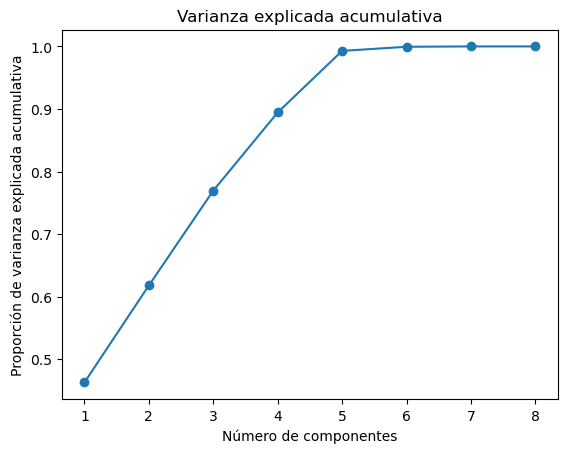

In [84]:
# Gráfico para visualizar la varianza explicada acumulativa
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes")
plt.ylabel("Proporción de varianza explicada acumulativa")
plt.show()

Componentes principales:
      X1     X2     X3     X4     X5     X6     X7     X8
0  0.496 -0.502  0.033 -0.505  0.496  0.000  0.000 -0.000
1 -0.245  0.232  0.894 -0.206  0.210 -0.000  0.000  0.000
2  0.000  0.000  0.000  0.000  0.000  0.000 -0.707 -0.707
3  0.000 -0.000 -0.000  0.000 -0.000 -1.000 -0.000 -0.000
4  0.000 -0.000 -0.000  0.000  0.000 -0.000 -0.707  0.707
5  0.495 -0.066  0.291 -0.205 -0.790 -0.000 -0.000 -0.000
6 -0.670 -0.505 -0.087 -0.450 -0.293 -0.000 -0.000 -0.000
7  0.000 -0.660  0.327  0.677  0.000  0.000  0.000  0.000


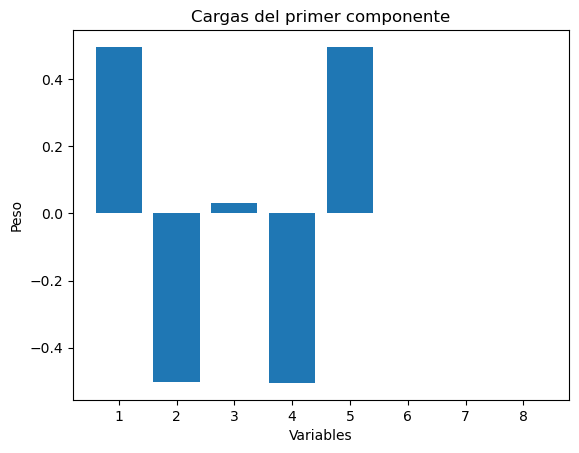

In [87]:
# Los componentes principales
components = pca.components_

# Convertir a DataFrame para facilidad de interpretación
components_df = pd.DataFrame(components, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])

print("Componentes principales:")
print(components_df)

# Visualizar los loadings del primer componente
plt.bar(range(1, 9), components[0])
plt.title("Cargas del primer componente")
plt.xlabel("Variables")
plt.ylabel("Peso")
plt.show()

In [88]:
# Transformar los datos con el número de componentes seleccionados
num_components = 3  # Por ejemplo
X_reduced = pca.transform(X_normalized)[:, :num_components]

# Crear un DataFrame con los datos reducidos
reduced_data = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(num_components)])

print("Datos reducidos:")
print(reduced_data.head())

Datos reducidos:
    PC1    PC2   PC3
0 3.129 -0.902 2.528
1 3.129 -0.902 2.528
2 3.129 -0.902 2.528
3 3.129 -0.902 2.528
4 2.356 -0.142 2.528


In [91]:
# Obtener las cargas para las tres primeras componentes
components = pca.components_[:3]

# Convertir las cargas a un DataFrame
loadings_df = pd.DataFrame(components, columns=X.columns, index=["PC1", "PC2", "PC3"])

print("Cargas de los tres primeros componentes:")
print(loadings_df)

Cargas de los tres primeros componentes:
        X1     X2    X3     X4    X5     X6     X7     X8
PC1  0.496 -0.502 0.033 -0.505 0.496  0.000  0.000 -0.000
PC2 -0.245  0.232 0.894 -0.206 0.210 -0.000  0.000  0.000
PC3  0.000  0.000 0.000  0.000 0.000  0.000 -0.707 -0.707


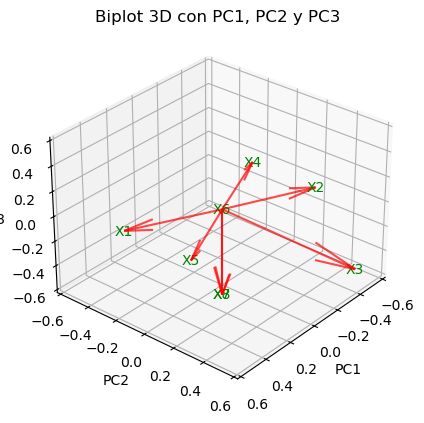

In [112]:
from mpl_toolkits.mplot3d import Axes3D

scale_factor = 2.0

# Crear un biplot en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Dibujar los vectores de carga para cada variable
for i, column in enumerate(X.columns):
    ax.quiver(0, 0, 0, components[0, i], components[1, i], components[2, i], color='r', alpha=0.7, length=1)
    ax.text(components[0, i], components[1, i], components[2, i], column, color='g', ha='center', va='center')

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_zlim(-0.6, 0.6)

ax.view_init(elev=30, azim=40) 

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Biplot 3D con PC1, PC2 y PC3")
plt.show() 